##### The objective of this project:
- Simple Version:
 * It is to analyse the data, make intelligent models that are capable of predicting certain feature(s) and then pitting these best selected model(s) against actual data to see how it works
- Long Version:
 * Part 1 is all about Data Exploration. Here we try and gain information of the data and clean the data that we are using,these questions are answered:
   1. What is the data about?
   2. What columns are related and inwhat manner?
   3. Questions about the data(domain related questions)[These are the sub-headings]
   4. How can I visualize these data to understand/present it better?
 * Part 2 is me trying to making a model that can predict the product from the customer's complaint narrative

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df_test = pd.read_csv("Edureka_Consumer_Complaints_test.csv")
df_train = pd.read_csv("Edureka_Consumer_Complaints_train.csv")
data_test = df_test.copy()
data_train = df_train.copy()

In [4]:
df_test.head(1)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2015-01-17,Credit card,NaN,Customer service / Customer relations,NaN,NaN,NaN,Citibank,TX,75241,NaN,NaN,Web,2015-01-17,Closed with monetary relief,Yes,1198133


# PART 1-DATA EXPLORATION

## Analyze the missing values in the columns

In [5]:
# Finding columns that has missing values and only displying those columns

def missing_values(dataframe):
    missing_value = pd.DataFrame((dataframe.isnull().sum())).T
    missing_value.index = ["Number of missing Elements"]
    for i in missing_value.columns:
        if int(missing_value[i].values) == 0 :
            del missing_value[i]
    return missing_value
    
test_missing_df = missing_values(data_test) 
train_missing_df = missing_values(data_train)
print("The Missing Values Columns of Train Data :")
display(train_missing_df)
print("\n\n")
print("The Missing Values Columns of Test Data :")
display(test_missing_df)


The Missing Values Columns of Train Data :


,Sub-product,Sub-issue,Consumer complaint narrative,Company public response,State,ZIP code,Tags,Consumer consent provided?
Number of missing Elements,103786,219374,302630,290879,2903,2911,308584,257230





The Missing Values Columns of Test Data :


,Sub-product,Sub-issue,Consumer complaint narrative,Company public response,State,ZIP code,Tags,Consumer consent provided?
Number of missing Elements,34683,73250,100692,97146,936,937,102629,85699


###### Looks like the missing values columns in both the datasets are the same 

## What is the number of unique values and most frequently occurring categories in the Categorical Columns?

In [6]:
#Lets set aside just the most required and best suited categorical features of this dataset
df = data_train.drop(["Date sent to company","Complaint ID","Date received"],axis = 1)

In [7]:
# Should convert Consumer complaint narrative to lowercase for better Analysis
df["Consumer complaint narrative"] = df["Consumer complaint narrative"].str.lower()

In [8]:
big_dict = dict()

In [9]:
# lets find the number of unique values and most occuring things/subjects in each of the selected columns
big_dict = dict()
for i in df.columns:
    number_unique_values = len(df[i].value_counts())
    highest_occuring_values = df[i].value_counts().index[0]
    big_dict.setdefault(i, [number_unique_values,highest_occuring_values])

In [10]:
df_1 = pd.DataFrame(big_dict)
df_1 = df_1.T
df_1.columns = ["Unique Values","Frequently Occuring"]

In [11]:
df_1

,Unique Values,Frequently Occuring
Product,12,Mortgage
Sub-product,47,Other mortgage
Issue,95,"Loan modification,collection,foreclosure"
Sub-issue,67,Account status
Consumer complaint narrative,55530,this company continues to report on my credit ...
Company public response,10,Company chooses not to provide a public response
Company,3064,Bank of America
State,62,CA
ZIP code,24181,300XX
Tags,3,Older American


###### Interesting things this process has shown, there are 12 products

##  Identify the top issues raised by consumers in this dataset

In [12]:
# we will continue to use the df dataset here
big_issues = df.Issue.value_counts().head(10)
big_issues_df = pd.DataFrame(big_issues)

In [13]:
big_issues_df

,Issue
"Loan modification,collection,foreclosure",60185
Incorrect information on credit report,43825
"Loan servicing, payments, escrow account",38456
Cont'd attempts collect debt not owed,27266
"Account opening, closing, or management",17557
Disclosure verification of debt,12283
Communication tactics,11457
Deposits and withdrawals,11028
"Application, originator, mortgage broker",8441
Billing disputes,7244


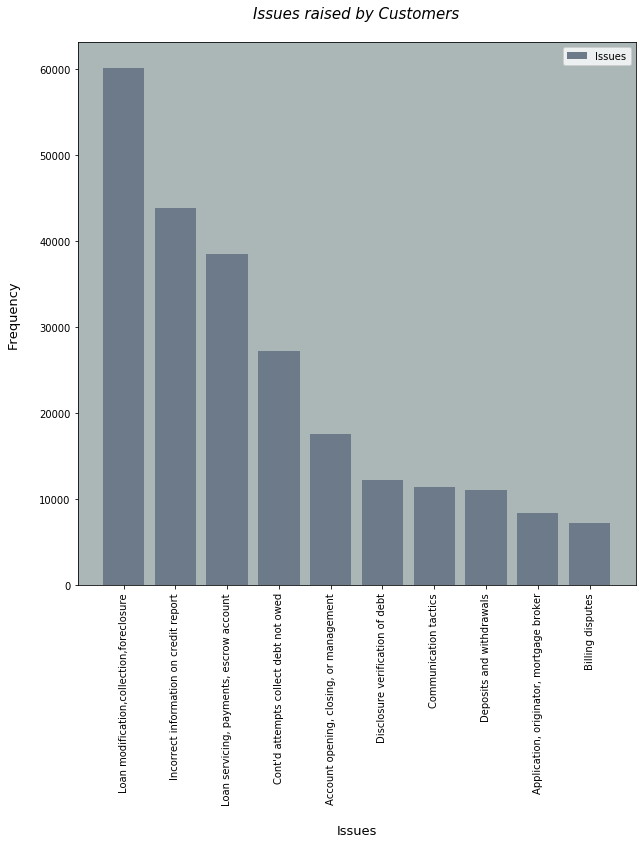

In [14]:
#Visualize this Data
plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.set_facecolor('#abb7b7')
plt.bar(big_issues_df.index,big_issues_df.Issue, color = "#6c7a89")
plt.title('Issues raised by Customers\n', fontsize=15, fontstyle='italic')
plt.xlabel('\nIssues', fontsize=13)
plt.ylabel('Frequency\n', fontsize=13)
plt.xticks(rotation=90)
plt.legend(["Issues"])
plt.show()

###### Here are the top 10 issues faced by customers as drawn from the Train Dataset.  Seems like loan modification/collection is what people face the most issues with!

## Products which receive a higher number of complaints

In [15]:
#again we use the df data from 1.2
highest_problem_products = df.Product.value_counts().head().index
highest_problem_products_count = df.Product.value_counts().head()
problem_data = zip(highest_problem_products,highest_problem_products_count)
problem_df = pd.DataFrame(problem_data,columns = ["Product","Number of Complaints"])
problem_df

,Product,Number of Complaints
0,Mortgage,117066
1,Debt collection,65033
2,Credit reporting,60672
3,Credit card,43114
4,Bank account or service,40667


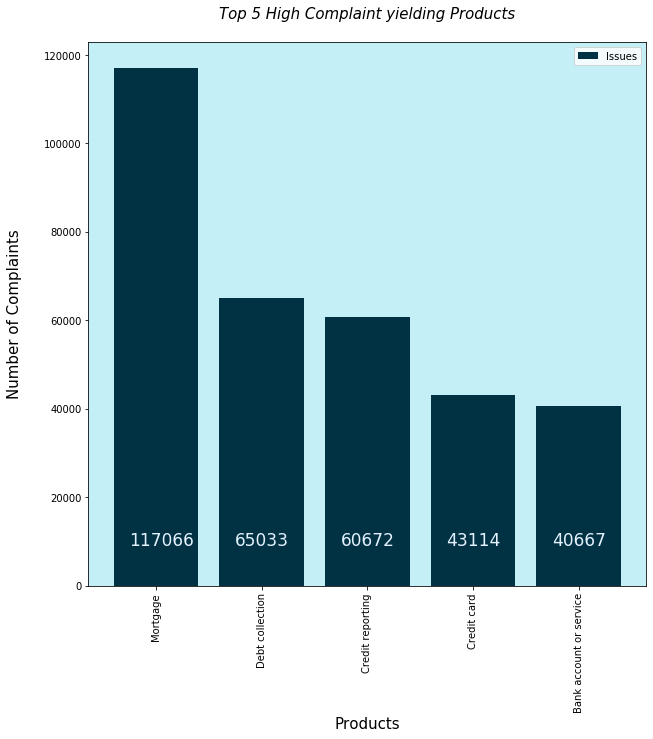

In [16]:
#Visualize this data
plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.set_facecolor('#c5eff7')
plt.bar(problem_df.Product,problem_df["Number of Complaints"],color = "#013243")
plt.title('Top 5 High Complaint yielding Products\n', fontsize=15, fontstyle='italic')
plt.xlabel('Products', fontsize=15)
plt.ylabel('Number of Complaints\n', fontsize=15)
for i, v in enumerate(problem_df["Number of Complaints"]):
    plt.text(i-.25,v/problem_df["Number of Complaints"][i]+9000,problem_df["Number of Complaints"][i],fontsize=17,color = "#e4f1fe")
plt.xticks(rotation=90)
plt.legend(["Issues"])
plt.show()

##### Mortgage seems to be the most product with complaints, with a count of 117066

## Do all the companies receive the same number of complaints?

In [17]:
# again using df
# lets check the count of companies
companies_count = df.Company.value_counts().head(20)
df_companies = pd.DataFrame(companies_count)
df_companies.reset_index(inplace = True)
df_companies.columns = ["Company","Number of Complaints"]
df_companies

,Company,Number of Complaints
0,Bank of America,34903
1,Wells Fargo & Company,26490
2,JPMorgan Chase & Co.,21677
3,Equifax,21489
4,Experian,20075
5,"TransUnion Intermediate Holdings, Inc.",16881
6,Citibank,16792
7,Ocwen,13110
8,Capital One,10082
9,Nationstar Mortgage,8414


##### Looks like Bank of America receives the most complaint, lets check the % though

In [18]:
ba_perc = (df_companies["Number of Complaints"][0]/len(df.Company))*100
print("The percentage of problems from Bank of America: {}".format(ba_perc))

The percentage of problems from Bank of America: 9.72743234580976


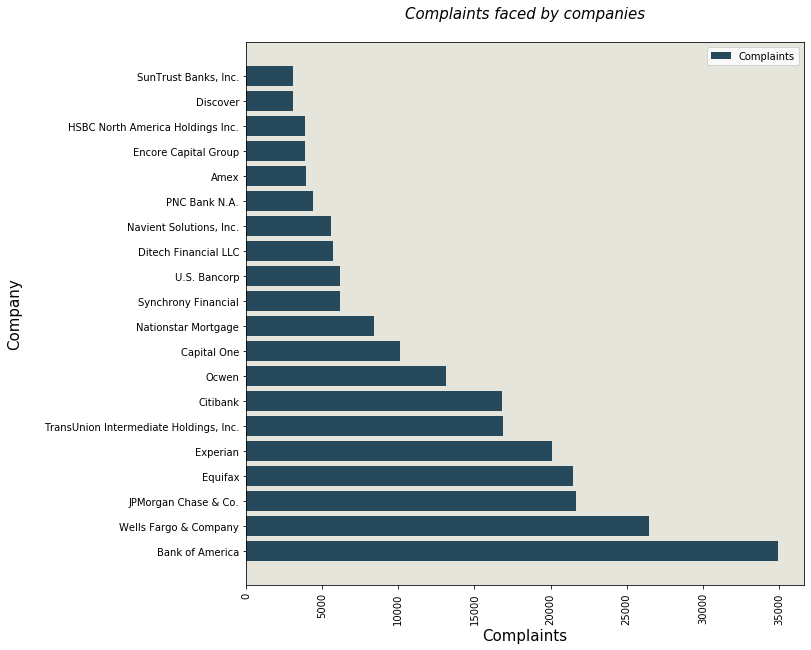

In [19]:
#Visualize this data
plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.set_facecolor('#e5e5dc')
plt.barh(df_companies.Company,df_companies["Number of Complaints"],color='#26495c')
plt.title('Complaints faced by companies\n', fontsize=15, fontstyle='italic')
plt.xlabel('Complaints', fontsize=15)
plt.ylabel('Company\n', fontsize=15)
plt.xticks(rotation=90)
plt.legend(["Complaints"])
plt.show()

##### This concludes that companies hardly receive equal number of complaints

## How are the complaints submitted ?

In [20]:
#again using df
# lets check the medium usedto submit the issues
medium_name = df["Submitted via"].value_counts().index
medium_count = df["Submitted via"].value_counts().values
df_medium = pd.DataFrame([medium_name,medium_count]).T
df_medium.columns = ["Medium","Counts"]
df_medium

,Medium,Counts
0,Web,235462
1,Referral,68450
2,Phone,25802
3,Postal mail,23644
4,Fax,5264
5,Email,188


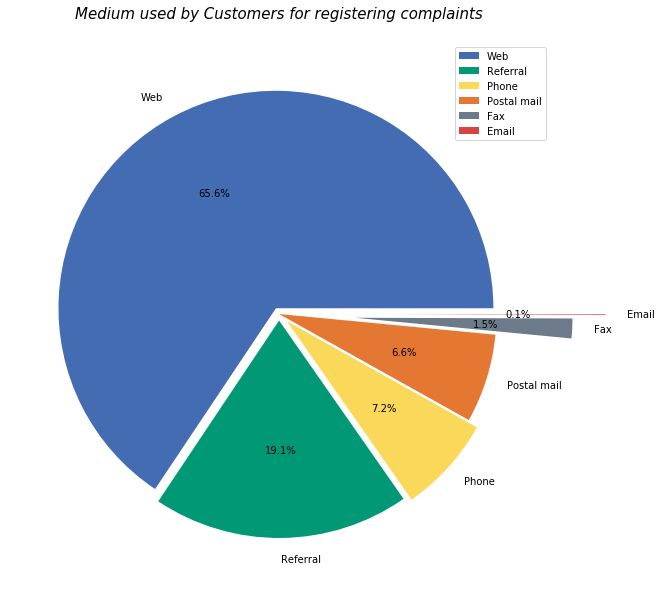

In [21]:
# Lets Visualize this data 
plt.figure(figsize=(10,10))
plt.title('Medium used by Customers for registering complaints\n', fontsize=15, fontstyle='italic')
col_list= ["#446cb3","#019875","#fad859","#e47833","#6c7a89","#d64541"]
explode = (0.03,0.03,0.05,0,0.35,0.5)
plt.pie(medium_count,colors = col_list,explode = explode,autopct='%.1f%%',labels = medium_name)
plt.legend()
plt.show()

##### This shows Web is the most used medium and email being the least used one

## Geographical distribution of the complaints

In [22]:
#again using df
state_name = df.State.value_counts().index
state_count = df.State.value_counts().values
df_state = pd.DataFrame([state_name,state_count]).T
df_state.columns = ["State Name","Number of Complaints"]
df_state

,State Name,Number of Complaints
0,CA,52368
1,FL,34567
2,TX,26683
3,NY,24554
4,GA,15886
...,...,...
57,MH,19
58,MP,13
59,AS,9
60,PW,8


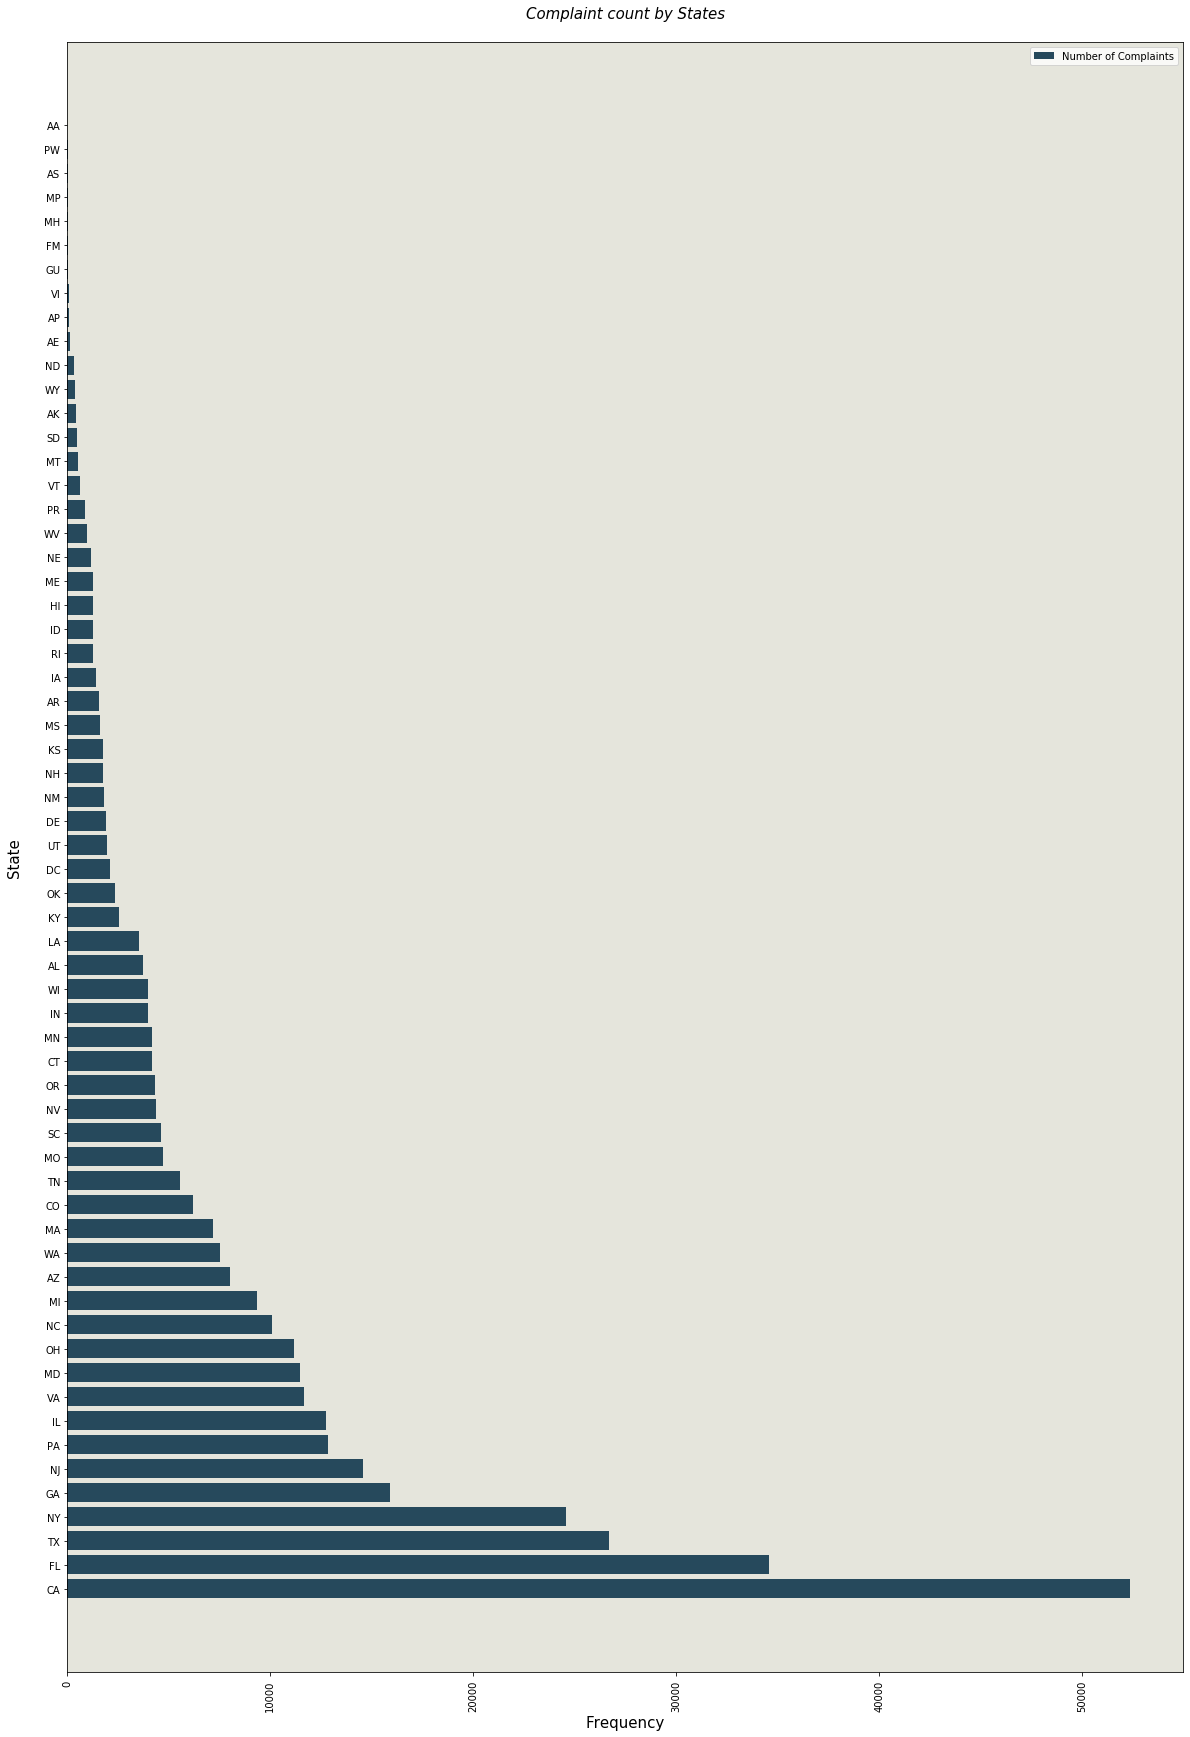

In [23]:
#Visualize this data
plt.figure(figsize=(20, 30))
ax = plt.axes()
ax.set_facecolor('#e5e5dc')
plt.barh(df_state["State Name"],df_state["Number of Complaints"],color='#26495c')
plt.title('Complaint count by States\n', fontsize=15, fontstyle='italic')
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('State\n', fontsize=15)
plt.xticks(rotation=90)
plt.legend(["Number of Complaints"])
plt.show()

##### This Figure shows the most complaints are from California, then Florida.

## Do the complaints rise in any specific month or day of the week?

In [24]:
#using the data_train
date = data_train["Date received"]
date = pd.to_datetime(date)
df_date = date.to_frame()
df_date["Month Number"] = date.dt.month
df_date["Month Name"] = date.dt.month_name()
df_date["Day Number"] = date.dt.day
df_date["Day Name"] = date.dt.day_name()
df_date["Year"] = date.dt.year

In [25]:
df_date

,Date received,Month Number,Month Name,Day Number,Day Name,Year
0,2015-10-14,10,October,14,Wednesday,2015
1,2015-04-26,4,April,26,Sunday,2015
2,2013-12-20,12,December,20,Friday,2013
3,2016-03-03,3,March,3,Thursday,2016
4,2015-01-30,1,January,30,Friday,2015
...,...,...,...,...,...,...
358805,2014-04-14,4,April,14,Monday,2014
358806,2013-03-14,3,March,14,Thursday,2013
358807,2013-02-01,2,February,1,Friday,2013
358808,2015-06-25,6,June,25,Thursday,2015


In [26]:
month_count_name = df_date["Month Number"].value_counts().index
month_count_value = df_date["Month Number"].value_counts().values
df_month = pd.DataFrame([month_count_name,month_count_value]).T
df_month.columns =["Month","Number of Complaints"]
df_month.sort_values("Month", inplace = True)
df_month["Month"]= pd.to_datetime(df_month.Month,format = "%m").dt.month_name()

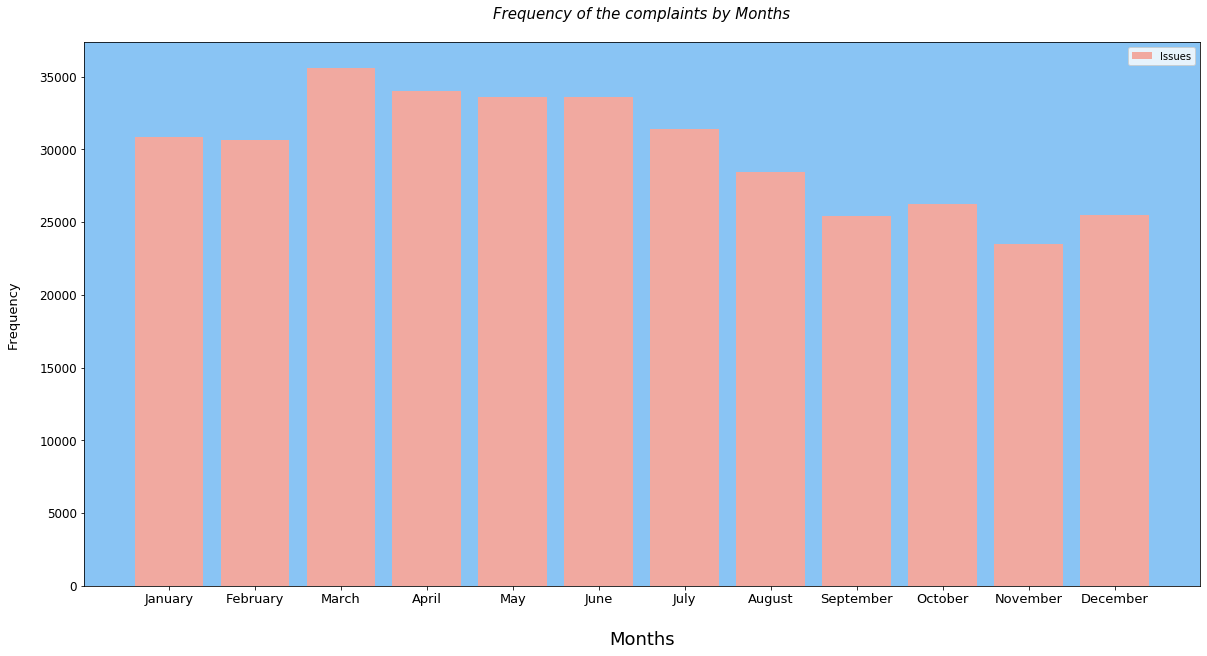

In [27]:
#Visualize this Data
plt.figure(figsize=(20, 10))
ax = plt.axes()

ax.set_facecolor('#89c4f4')
plt.bar(df_month["Month"],df_month["Number of Complaints"], color = "#f1a9a0")
plt.title('Frequency of the complaints by Months\n', fontsize=15, fontstyle='italic')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\nMonths', fontsize=18)
plt.ylabel('Frequency\n', fontsize=13)
#plt.xticks(rotation=90)
plt.legend(["Issues"])
plt.show()

In [28]:
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_count_name = df_date["Day Name"].value_counts().index
day_count_value = df_date["Day Name"].value_counts().values
df_day = pd.DataFrame([day_count_name,day_count_value]).T
df_day.columns =["Day","Number of Complaints"]
df_day["Day"] = pd.Categorical(df_day.Day, categories=days, ordered=True)
df_day.sort_values("Day", inplace = True)
df_day.reset_index(drop = True, inplace = True)
df_day

,Day,Number of Complaints
0,Monday,58817
1,Tuesday,68750
2,Wednesday,69583
3,Thursday,66618
4,Friday,59348
5,Saturday,20752
6,Sunday,14942


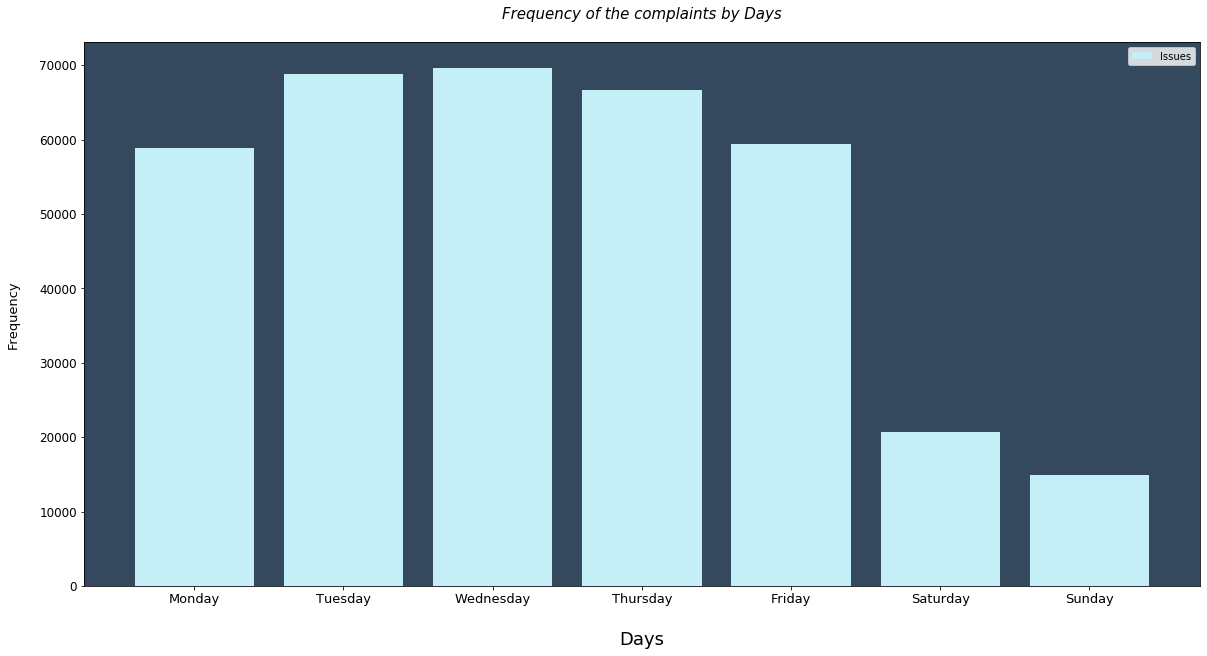

In [29]:
#Visualize this Data
plt.figure(figsize=(20, 10))
ax = plt.axes()
ax.set_facecolor('#34495e')
plt.bar(df_day["Day"],df_day["Number of Complaints"], color = "#c5eff7")
plt.title('Frequency of the complaints by Days\n', fontsize=15, fontstyle='italic')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\nDays', fontsize=18)
plt.ylabel('Frequency\n', fontsize=13)
#plt.xticks(rotation=90)
plt.legend(["Issues"])
plt.show()

##### The above figures shows complaints increase on March and on Wednesdays. Sundays and November seem to have the least complaints


## Companies response to customers and the most common responses

In [30]:
#using data_train
response_name = data_train["Company response to consumer"].value_counts().index
response_count = data_train["Company response to consumer"].value_counts().values
df_response = pd.DataFrame([response_name,response_count]).T
df_response.columns = ["Response","Frequency"]
df_response

,Response,Frequency
0,Closed with explanation,265700
1,Closed with non-monetary relief,46085
2,Closed with monetary relief,24715
3,Closed without relief,10604
4,Closed,8568
5,Closed with relief,3138


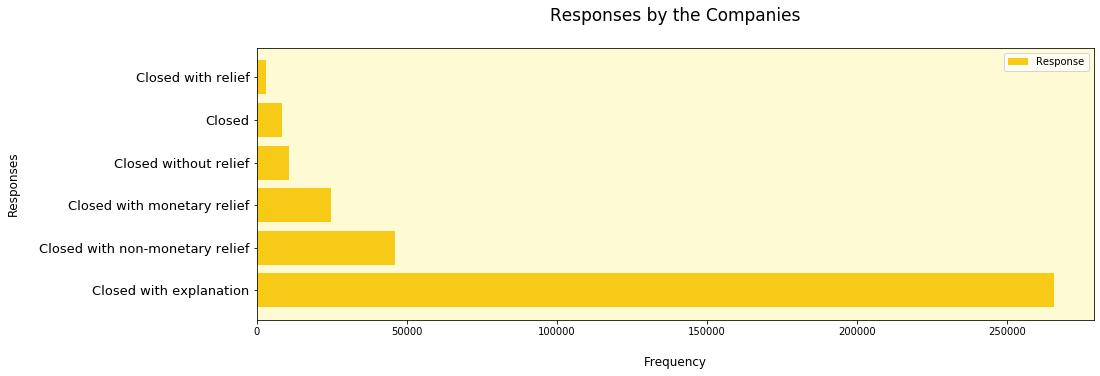

In [31]:
plt.figure(figsize=(15, 5))
ax = plt.axes()
plt.barh(df_response.Response, df_response.Frequency, color='#f7ca18')
plt.title('Responses by the Companies\n', fontsize=17)
ax.set_facecolor('#fefad4') 
plt.xlabel('\nFrequency', fontsize=12)
plt.ylabel('Responses\n', fontsize=12)
plt.yticks( fontsize=13)
plt.legend(["Response"])
plt.show()

##### Companies respond to customers in 5 different ways. The response with the highest frequency is "Closed With Explanation"

## Responding to complaints in a timely manner alter the number of consumers that disputed the company response ?

In [32]:
#using data_train
response_dt = data_train[["Timely response?","Consumer disputed?","Complaint ID"]]

In [33]:
response = response_dt.groupby(["Timely response?","Consumer disputed?"]).count()
display(response)
timely = response.iloc[2:,:]
not_timely = response.iloc[0:2,:]

# Timely response and the customer disputed
timely_dispute = int(timely.iloc[1:,]['Complaint ID'].values)

# Timely response and the customer did not dispute
timely_nodispute = int(timely.iloc[:1]['Complaint ID'].values)

# Not timely response and the customer disputed
nontimely_dispute = int(not_timely[1:].values)

# Not timely response and the customer did not dispute
nontimely_nodispute = int(not_timely[0:1].values)


Complaint ID
Timely response? Consumer disputed?              
No               No                          4906
                 Yes                         1229
Yes              No                        277732
                 Yes                        74943

In [34]:
print("#################################################################")
print("% Of times response was timely and cusomter disputed      : {}%".format(round(timely_dispute/(timely_dispute+timely_nodispute),2)*100))
print("% Of times response was not-timely and cusomter disputed  : {}%".format(round(nontimely_dispute/(nontimely_dispute+nontimely_nodispute),2)*100))
print("#################################################################")

#################################################################
% Of times response was timely and cusomter disputed      : 21.0%
% Of times response was not-timely and cusomter disputed  : 20.0%
#################################################################


##### It looks like Timely response or otherwise, does not actually have an impact on the Dispute decision by the customer

# PART 2-TEXT BASED MODELLING

##### Making a text classifier to identify the product from Consumer Narrative

In [182]:
import string,re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [36]:
data_train["Consumer complaint narrative"]=data_train["Consumer complaint narrative"].str.lower()
narrative = data_train["Consumer complaint narrative"].dropna()
type(narrative)

pandas.core.series.Series

In [37]:
# This code can be skipped ,cleaned text is saved as a CSV 1/5
def text_cleaner(text):
    #text = word_tokenize(text)
    #text = " ".join(text)
    text = [word for word in text.split() if word.lower() not in stopwords.words("English")]
    text = " ".join(text)
    text = [char for char in text if char not in string.digits]
    text = "".join(text)
    text = text.replace('xxxx', '')
    text = text.replace('xx', '')
    text = [char for char in text if char not in string.punctuation]
    text = "".join(text)
    text = word_tokenize(text)
    text = " ".join(text)
    return text
    
ten_cleaned = narrative.apply(text_cleaner)

In [38]:
# This code can be skipped ,cleaned text is saved as a CSV 2/5
ten_cleaned.reset_index(drop = True,inplace = True)

In [39]:
# This code can be skipped ,cleaned text is saved as a CSV 3/5
df_narrative = pd.DataFrame()
df_narrative["Consumer complaint narrative Original"]=data_train["Consumer complaint narrative"].str.lower()
df_narrative["Product"] = data_train["Product"]
df_narrative.dropna(inplace = True)
df_narrative.reset_index(drop= True, inplace = True)
df_narrative_final = pd.concat([df_narrative,ten_cleaned],axis = 1)

In [40]:
# This code can be skipped ,cleaned text is saved as a CSV 4/5
df_narrative_final.Product.value_counts()

Debt collection            14402
Mortgage                   12244
Credit reporting           10670
Credit card                 6659
Bank account or service     4875
Consumer Loan               3104
Student loan                2371
Prepaid card                 608
Payday loan                  604
Money transfers              543
Other financial service       96
Virtual currency               4
Name: Product, dtype: int64

In [41]:
# This code can be skipped ,cleaned text is saved as a CSV 5/5
df_narrative_final.drop("Consumer complaint narrative Original",inplace = True,axis = 1)
df_narrative_final.head(1)

,Product,Consumer complaint narrative
0,Bank account or service,privileged confidential informationdear consum...


In [42]:
df_narrative_final.to_csv("FINAL.csv")

##### HAD to save this as a csv as the text cleaning process took >1hour. 


In [96]:
# # if csv is needed, uncomment this set of code:
df_narrative_final = pd.read_csv("FINAL.csv")
df_narrative_final.drop('Unnamed: 0',axis = 1, inplace = True)
df_narrative_final

,Product,Consumer complaint narrative
0,Bank account or service,privileged confidential informationdear consum...
1,Mortgage,homeowner applied nd modification due reset fi...
2,Debt collection,started service cable company named account we...
3,Consumer Loan,went dealership told would receive rate agreed...
4,Debt collection,requested portfolio recovery services prs clai...
...,...,...
56175,Mortgage,short sell approved ocwen home listed instruct...
56176,Credit card,required use government card travel erroneousl...
56177,Credit reporting,working tirelessly repairing credit history in...
56178,Debt collection,consumer financial protection bureaure dear in...


In [97]:
lb = LabelEncoder()
labelled = lb.fit_transform(df_narrative_final["Product"])

In [98]:
print(type(labelled_product))
labeled_product = pd.Series(labelled).T

<class 'numpy.ndarray'>


In [99]:
df_narrative = pd.concat([df_narrative_final,labeled_product],axis = 1)

In [100]:
df_narrative.rename(columns = {0:"Product Number"}, inplace = True)

In [101]:
#Checks
# print(df_narrative.Product.value_counts())
# print(df_narrative.isnull().sum())
# print(df_narrative["Product Number"].value_counts())
# df_narrative.columns
#df_narrative.to_csv("Final_Narrative.csv")
#df_narrative.drop("Product", axis = 1, inplace = True)
df_narrative

,Product,Consumer complaint narrative,Product Number
0,Bank account or service,privileged confidential informationdear consum...,0
1,Mortgage,homeowner applied nd modification due reset fi...,6
2,Debt collection,started service cable company named account we...,4
3,Consumer Loan,went dealership told would receive rate agreed...,1
4,Debt collection,requested portfolio recovery services prs clai...,4
...,...,...,...
56175,Mortgage,short sell approved ocwen home listed instruct...,6
56176,Credit card,required use government card travel erroneousl...,2
56177,Credit reporting,working tirelessly repairing credit history in...,3
56178,Debt collection,consumer financial protection bureaure dear in...,4


##### splitting the data into train and test, but the product percentage has high variance(the number of times Debt shows up is extremely high compared to Virtual currency etc), will it effect the model? can prediction be bettered with stratification? If the score of the model without stratify is extremely high( > 90%), I will not make another model with stratification


### Model without stratify

In [80]:
X = df_narrative["Consumer complaint narrative"]
y = df_narrative["Product Number"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.3,random_state = 101)

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, ngram_range=(1, 2), stop_words='english')
fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)

In [86]:
model = LinearSVC().fit(tfidf_vectorizer_vectors, y_train)
svc_score = model.score(tfidf_vectorizer_vectors, y_train)
print(round(svc_score,3))

0.995


##### Looks like the model is very good, lets check it 

In [ ]:
# Select 10 random complaints from the df_narrative and lets check if the model can predict the product right
## selecting 10 random numbers between 0 and the total length of the dataframe, these generated numbers represent
## the row number/index in the dataframe
import random
random_list = []
for counter in range(0,10):
    random_list.append(random.randint(0,len(df_narrative["Consumer complaint narrative"])))
success_counter = 0
failure_counter = 0
for i in random_list:
    print("The generated number is {}\nThe actual product code is {}\nThe actual product name is {}"
         .format(i,int(df_narrative["Product Number"].iloc[i:i+1].values),str(df_narrative["Product"].iloc[i:i+1].values)))
    complaint = (df_narrative["Consumer complaint narrative"].iloc[i:i+1])
    for j in complaint:
        complaint = j
    predicted_product = model.predict(fitted_vectorizer.transform([complaint]))
    print("The PREDICTED PRODUCT code is {}".format(int(predicted_product)))
    if (int(predicted_product)) == (int(df_narrative["Product Number"].iloc[i:i+1].values)):
                                    print("Prediction Successful!")
                                    print("########################\n")
                                    success_counter += 1
    else:
        print("Prediction Unsuccessful!")
        failure_counter +=1
        
print("Out of {} samples, this model correctly predicted {} of them.".format(len(random_list),success_counter))
    

##### Looks like our model is certainly decent. It can correctly predict the product from the customer's narrative. There is always a chance the model will wrongly predict a product, but the chance of that happenning is extremely less.

In [ ]:
# Lets use this model to predict on the Test data

In [181]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, ngram_range=(1, 2), stop_words='english')
fitted_vectorizer_test = tfidf.fit(X_test)
tfidf_vectorizer_vectors_test = fitted_vectorizer.transform(X_test)
pred = model.predict(tfidf_vectorizer_vectors_test)

In [185]:
accuracyScore = round(accuracy_score(y_test,pred),3)
print("The Accuracy Score is {}%".format(accuracyScore*100))

The Accuracy Score is 86.4%


##### Not overfitting and certainly not underfitting. looks good.
##### This ends the Text Modelling 

# Build a model to predict whether the consumer will dispute the resolution of the complaint or not

## Feature Engineering or the art of selecting the right features and processing them

In [363]:
#lets take a look at the data again
df_train = data_train.copy() # making a copy of the dataset
df_test = data_test.copy()
display(data_train.head(1))

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Equifax,GA,30134,NaN,Consent not provided,Web,2015-10-14,Closed with explanation,Yes,No,1605653


In [364]:
#check the nans
def missing_values(dataframe):
    missing_value = pd.DataFrame((dataframe.isnull().sum())).T
    missing_value.index = ["percent of missing Elements"]
    for i in missing_value.columns:
        if int(missing_value[i].values) == 0 :
            del missing_value[i]
        else:
            missing_value[i] = (missing_value[i]/len(dataframe))*100             
    return missing_value
    
train_missing_df = missing_values(df_train)
print("The Missing Values Columns of Train Data(%) :")
display(train_missing_df)
print("\n\n")
test_missing_df = missing_values(df_test)
print("The Missing Values Columns of Test Data(%) :")
display(test_missing_df)


The Missing Values Columns of Train Data(%) :


,Sub-product,Sub-issue,Consumer complaint narrative,Company public response,State,ZIP code,Tags,Consumer consent provided?
percent of missing Elements,28.925058,61.139322,84.342688,81.067696,0.809063,0.811293,86.002062,71.689752





The Missing Values Columns of Test Data(%) :


,Sub-product,Sub-issue,Consumer complaint narrative,Company public response,State,ZIP code,Tags,Consumer consent provided?
percent of missing Elements,28.997709,61.242747,84.186412,81.221678,0.782569,0.783406,85.805896,71.651088


### Feature Removal

In [365]:
# right off the bat, I see complaint ID is not really important, I am going to remove that
# also narrative might hamper our model,Sub-issue,Company public response,Tags and Consumer consent provided? 
# has extremely high missing value
# Going to keep the treshold of selecting features at maximum 35%
def feature_removal(dataframe):
    dataframe.drop(["Complaint ID","Consumer complaint narrative","Sub-issue","Company public response",
                   "Tags","Consumer consent provided?"],axis = 1, inplace = True) 
    #everything being done on the train, the test gets it too

feature_removal(df_train)
feature_removal(df_test)
train_missing_df = missing_values(df_train)
print("The Missing Values Columns of Train Data(%) :")
display(train_missing_df)
print("\n\n")
test_missing_df = missing_values(df_test)
print("The Missing Values Columns of Test Data(%) :")
display(test_missing_df)


The Missing Values Columns of Train Data(%) :


,Sub-product,State,ZIP code
percent of missing Elements,28.925058,0.809063,0.811293





The Missing Values Columns of Test Data(%) :


,Sub-product,State,ZIP code
percent of missing Elements,28.997709,0.782569,0.783406


### Handling NaN

In [366]:
def filling(dataframe):
    dataframe.fillna("Not Available",axis = 1, inplace = True)
filling(df_train)
filling(df_test)

### Handling Dates

In [367]:
def gettingdateformat(dataframe):
    dataframe[["Date received","Date sent to company"]] = dataframe[["Date received","Date sent to company"]].apply(pd.to_datetime)
gettingdateformat(df_train)
gettingdateformat(df_test)

In [368]:
df_train

,Date received,Product,Sub-product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?
0,2015-10-14,Credit reporting,Not Available,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,No
1,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,Yes
2,2013-12-20,Credit card,Not Available,Other,Citibank,SC,29203,Phone,2014-01-03,Closed with non-monetary relief,Yes,No
3,2016-03-03,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,Referral,2016-03-04,Closed with explanation,Yes,No
4,2015-01-30,Debt collection,Medical,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,90036,Web,2015-01-30,Closed with explanation,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
358805,2014-04-14,Credit reporting,Not Available,Incorrect information on credit report,Experian,OR,97306,Web,2014-04-13,Closed with non-monetary relief,Yes,No
358806,2013-03-14,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",Citibank,OH,43026,Referral,2013-03-18,Closed with non-monetary relief,Yes,No
358807,2013-02-01,Credit card,Not Available,Payoff process,Capital One,TX,76021,Web,2013-02-01,Closed,Yes,Yes
358808,2015-06-25,Debt collection,"Other (i.e. phone, health club, etc.)",Cont'd attempts collect debt not owed,Encore Capital Group,FL,33256,Phone,2015-06-29,Closed with non-monetary relief,Yes,No


### Feature Creation

In [369]:
def datecreation(dataframe):
    dataframe['Day received name'] = dataframe['Date received'].dt.day_name()
    dataframe['Week received'] = dataframe['Date received'].dt.week
    dataframe['Month received'] = dataframe['Date received'].dt.month_name()
    dataframe['Day name sent to company'] = dataframe['Date sent to company'].dt.day_name()
    dataframe['Week sent to company'] = dataframe['Date sent to company'].dt.week
    dataframe['Month sent to company'] = dataframe['Date sent to company'].dt.month_name()
    dataframe['Time interval'] = (dataframe['Date sent to company'] - dataframe['Date received']).dt.days
    dataframe.drop(['Date received','Date sent to company'],axis = 1,inplace = True)
    for counter,i in enumerate(dataframe["Time interval"]):
        if i < 0:
            dataframe["Time interval"].iloc[counter] = 0
datecreation(df_train)
datecreation(df_test)

D:\anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [370]:
df_train.head(1)

,Product,Sub-product,Issue,Company,State,ZIP code,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Day received name,Week received,Month received,Day name sent to company,Week sent to company,Month sent to company,Time interval
0,Credit reporting,Not Available,Incorrect information on credit report,Equifax,GA,30134,Web,Closed with explanation,Yes,No,Wednesday,42,October,Wednesday,42,October,0


### Feature Labelling

In [371]:
df_train.dtypes

Product                         object
Sub-product                     object
Issue                           object
Company                         object
State                           object
ZIP code                        object
Submitted via                   object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Day received name               object
Week received                    int64
Month received                  object
Day name sent to company        object
Week sent to company             int64
Month sent to company           object
Time interval                    int64
dtype: object

In [372]:
object_list = []
for i in df_train.columns:
    if df_train[i].dtypes == "object":
        object_list.append(i)
object_list.append()
print(object_list)
        

TypeError: append() takes exactly one argument (0 given)

In [373]:
def encod(dataframe):
    for i in object_list:
        try:
            dataframe[i] = lb.fit_transform(dataframe[i])
        except:
            pass
encod(df_train)
encod(df_test)    

In [379]:
final_data = df_train.copy()
final_data.head(1)


,Product,Sub-product,Issue,Company,State,ZIP code,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Day received name,Week received,Month received,Day name sent to company,Week sent to company,Month sent to company,Time interval
0,3,29,52,998,15,7869,5,1,1,0,6,42,10,6,42,10,0


##### This ends feature handling, going forward, the test data (df_test) will not be touched

## Model Selection

### Feature Selection

In [358]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,KFold, GridSearchCV
from sklearn.metrics import accuracy_score, r2_score, roc_auc_score, f1_score

In [382]:
rfc = RandomForestClassifier(random_state = 101)
X = final_data.drop(["Consumer disputed?"],axis = 1)
y = final_data["Consumer disputed?"]

In [383]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state= 101)

In [384]:
model = rfc.fit(X_train,y_train)

In [425]:
predictor = X.columns.tolist()
feature_selection = pd.Series(model.feature_importances_,index= (predictor)).sort_values(ascending=False)

In [426]:
feature_selection

ZIP code                        0.205847
Company                         0.119533
State                           0.110257
Week sent to company            0.078342
Week received                   0.078323
Issue                           0.067558
Day received name               0.060976
Day name sent to company        0.059629
Time interval                   0.055041
Sub-product                     0.046881
Month sent to company           0.025997
Month received                  0.025759
Company response to consumer    0.022733
Product                         0.019599
Submitted via                   0.019483
Timely response?                0.004042
dtype: float64

In [428]:
#dropping Timely response
final_data.drop("Timely response?",axis =1, inplace = True)